# Projeto de Redes Sociais

Cicero Tiago Carneiro Valentim

Lais Nascimento da Silva

Thalia Loiola da Silva

William Augusto Reis da Silva

### Bibliotecas

In [1]:
from graph_tool import centrality, clustering, PropertyMap
from graph_tool import Graph
# from graph_tool.all import graph_draw
from netpixi.data.gt import *
from netpixi import render, peek
import netpixi
import pandas as pd
import netpixi
import numpy as np

Às vezes é necessário instalar o openpyxl. Só descomentar:

In [6]:
# !pip install openpyxl

     |████████████████████████████████| 242 kB 4.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


## Carregamento do grafo

In [2]:
grafo_titulo = load_gt('projeto-one-mode-dicotomizado.net.gz')

In [3]:
from graph_tool import centrality, clustering

# calculo clustering coefficient
c = clustering.local_clustering(grafo_titulo)

# calculo betweenness
bc, _ = centrality.betweenness(grafo_titulo)

grafo_titulo.vp['betweenness'] = bc
grafo_titulo.vp['clustering'] = c

In [4]:
df = pd.DataFrame({k: list(v) for k, v in grafo_titulo.vp.items()})

In [7]:
filmes = pd.read_excel('netflix.xlsx')

In [8]:
df.sort_values(by='betweenness')

,id,nome,_x,_y,betweenness,clustering
4570,4570,The Accidental Detective,1462.444475,-296.184349,0.000000,0.000000
5880,5880,Suite Francaise,-49.057870,82.788402,0.000000,1.000000
5879,5879,Legend,20.440279,180.686767,0.000000,1.000000
5878,5878,David Beckham: Into the Unknown,1146.086944,396.684496,0.000000,0.000000
5877,5877,Daddys Home,848.418539,-351.984671,0.000000,0.000000
...,...,...,...,...,...,...
3344,3344,Doraemon the Movie: Nobita in the Secret Gadge...,71.634063,70.004605,0.002574,0.201068
5556,5556,Lupin the 3rd TV Special: Sweet Lost Night,53.699901,105.554355,0.002686,0.200062
8262,8262,Black Butler,55.221557,99.514835,0.003994,0.173171
5815,5815,Steven Universe,62.987539,66.530887,0.004380,0.159512


In [9]:
filmes.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

In [10]:
filmes_score = filmes[['IMDb Score', 'Title']].rename(columns={"Title":"nome"})

In [11]:
filmes_score.nome = filmes_score.nome.astype(str, copy=False)
df.nome = df.nome.astype(str, copy=False)
df.id = df.id.astype(int, copy=False)

Remoção de filmes duplicados

In [12]:
filmes_score = filmes_score.drop_duplicates(subset=['nome'], keep=False)

Adição da coluna `IMDb Score` ao datafram `df`

In [13]:
df

,id,nome,_x,_y,betweenness,clustering
0,0,Lets Fight Ghost,-1.436253,77.806371,0.000003,0.794466
1,1,HOW TO BUILD A GIRL,-229.729180,1039.631642,0.000000,0.000000
2,2,The Con-Heartist,854.216640,357.749654,0.000000,0.000000
3,3,Gleboka woda,-62.084147,-830.782865,0.000000,0.000000
4,4,Only a Mother,698.456925,1632.287651,0.000000,0.000000
...,...,...,...,...,...,...
9136,9136,13 Going on 30,837.615451,675.264901,0.000000,0.000000
9137,9137,LIFE 2.0,1084.806275,-34.898042,0.000000,0.000000
9138,9138,Brand New Day,405.029912,-1525.691346,0.000000,0.000000
9139,9139,Daniel Arends: Blessuretijd,1125.114434,89.985930,0.000000,0.000000


In [14]:
df = df.set_index('nome').join(filmes_score.set_index('nome'), how='left').reset_index()

In [15]:
df.nome.describe()

count                 9141
unique                9141
top       Lets Fight Ghost
freq                     1
Name: nome, dtype: object

In [16]:
df.head()

,nome,id,_x,_y,betweenness,clustering,IMDb Score
0,Lets Fight Ghost,0,-1.436253,77.806371,0.000003,0.794466,7.9
1,HOW TO BUILD A GIRL,1,-229.729180,1039.631642,0.000000,0.000000,5.8
2,The Con-Heartist,2,854.216640,357.749654,0.000000,0.000000,7.4
3,Gleboka woda,3,-62.084147,-830.782865,0.000000,0.000000,7.5
4,Only a Mother,4,698.456925,1632.287651,0.000000,0.000000,6.7


In [17]:
df = df.rename(columns={"IMDb Score": 'desempenho'})

In [18]:
df.head()

,nome,id,_x,_y,betweenness,clustering,desempenho
0,Lets Fight Ghost,0,-1.436253,77.806371,0.000003,0.794466,7.9
1,HOW TO BUILD A GIRL,1,-229.729180,1039.631642,0.000000,0.000000,5.8
2,The Con-Heartist,2,854.216640,357.749654,0.000000,0.000000,7.4
3,Gleboka woda,3,-62.084147,-830.782865,0.000000,0.000000,7.5
4,Only a Mother,4,698.456925,1632.287651,0.000000,0.000000,6.7


In [19]:
import seaborn as sns
sns.set()

In [20]:
import statsmodels.formula.api as smf

### Agrupamento

In [24]:
# pegamos apenas os betweenness com valores > 0 
a = df[df['betweenness'] > 0]
a

,nome,id,_x,_y,betweenness,clustering,desempenho
0,Lets Fight Ghost,0,-1.436253,77.806371,0.000003,0.794466,7.9
6,The Invisible,6,55.645344,122.529907,0.000031,0.653269,6.2
62,Ride Your Wave,62,44.678612,36.371525,0.000211,0.465652,6.8
68,Princess Principal,68,65.936711,69.644055,0.000005,0.635031,7.3
70,A Call to Spy,70,4.171069,165.698009,0.000025,0.662618,6.3
...,...,...,...,...,...,...,...
9109,Spy Kids 2: The Island of Lost Dreams,9109,83.692317,50.522193,0.000001,0.862922,5.2
9114,Teenage Mutant Ninja Turtles II: The Secret of...,9114,86.657705,54.618558,0.000001,0.862922,6.1
9116,Hunter X Hunter (2011),9116,58.049482,48.367685,0.000008,0.694411,8.9
9125,Inazuma Eleven,9125,68.987392,67.229944,0.000064,0.742204,8.0


<AxesSubplot:xlabel='betweenness', ylabel='desempenho'>

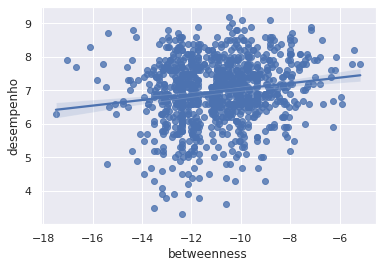

In [29]:
sns.regplot(x=np.log(a['betweenness']), y=a['desempenho'])

<AxesSubplot:xlabel='betweenness', ylabel='desempenho'>

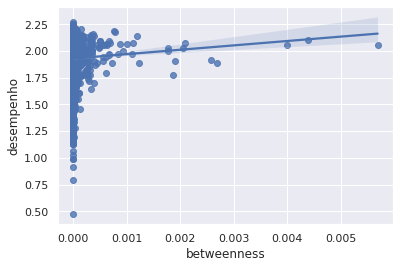

In [28]:
sns.regplot(x=df['betweenness'], y=np.log(df['desempenho']))

In [30]:
model = smf.ols(data=a, formula='desempenho ~ np.log(betweenness)')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desempenho   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     25.63
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           4.89e-07
Time:                        14:31:08   Log-Likelihood:                -1387.8
No. Observations:                1021   AIC:                             2780.
Df Residuals:                    1019   BIC:                             2789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.8854      0.183     43.001      0.000       7.526       8.245
np.log(betweenness)     0.0836      0.017      5.063      0.000       0.051       0.116
==============================================================================
Omnibus:                       55.815   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.392
Skew:                          -0.558   Prob(JB):                     6.31e-15
Kurtosis:                       3.540   Cond. No.                         69.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como esperado após a análise dos gráficos, o R² é bem pequeno quando queremos explicar o desempenho levando em conta o __betweenness__. Além disso, podemos ver que o coeficiente é positivo, indicando que existe uma relação positiva, no entanto, o _p\_valor_ é muito grande, ou seja, não podemos rejeitar a hipótese nula de que não há relação.

### Diversidade

<AxesSubplot:xlabel='clustering', ylabel='desempenho'>

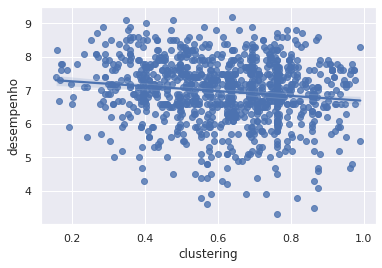

In [37]:
sns.regplot(x=a['clustering'], y=a['desempenho']) # % dos vizinhos conectados entre si 

# colocar como variavel de controle -> degree

In [35]:
model = smf.ols(data=a, formula='desempenho ~ clustering')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desempenho   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     18.53
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           1.83e-05
Time:                        14:41:59   Log-Likelihood:                -1391.3
No. Observations:                1021   AIC:                             2787.
Df Residuals:                    1019   BIC:                             2796.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4163      0.108     68.648      0.000       7.204       7.628
clustering    -0.7246      0.168     -4.305      0.000      -1.055      -0.394
==============================================================================
Omnibus:                       67.576   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.979
Skew:                          -0.621   Prob(JB):                     1.58e-18
Kurtosis:                       3.619   Cond. No.                         7.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² é desprezível quando queremos explicar o __desempenho__ levando em conta o __clustering__. Além disso, podemos ver que o coeficiente é negativo, indicando que existe uma relação negativa, no entanto, o _p\_valor_ é muito grande, ou seja, também não podemos rejeitar a hipótese nula de que não há relação.

Após analisarmos individualmente a contribuição de cada variável, decidimos testar o impacto da combinação das duas no desempenho do filme.

In [36]:
model = smf.ols(data=a, formula='desempenho ~ np.log(betweenness) + clustering')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desempenho   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     12.88
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           2.98e-06
Time:                        14:42:02   Log-Likelihood:                -1387.7
No. Observations:                1021   AIC:                             2781.
Df Residuals:                    1018   BIC:                             2796.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.8570      0.197     39.862      0.000       7.470       8.244
np.log(betweenness)     0.0747      0.028      2.670      0.008       0.020       0.130
clustering             -0.1121      0.284     -0.394      0.693      -0.670       0.446
==============================================================================
Omnibus:                       56.921   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.897
Skew:                          -0.564   Prob(JB):                     2.97e-15
Kurtosis:                       3.547   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pelo que se pode observar, a contribuição da combinação das variáveis não parece ser suficiente para explicar o desempenho de um filme. A combinação dos coeficientes com seus respectivos _p\_valores_ continua ruim, no entanto, podemos ver uma melhoria ínfima no R².

Portanto, dado que a hipótese era que, de alguma forma, o __agrupamento__ e a __diversidade__ explicavam o __desempenho__, pode-se dizer que a hipótese não se comprova estatisticamente ou que precisaríamos de um refinamento melhor no modelo.